In [1]:
import cv2
import os.path
import numpy as np
import pandas as pd
import tensorflow as tf

from PIL import Image
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score

C:\Users\Public\Downloads\Anaconda\envs\AMLS\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Public\Downloads\Anaconda\envs\AMLS\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Public\Downloads\Anaconda\envs\AMLS\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Public\Downloads\Anaconda\envs\AMLS\l

In [4]:
def get_data():
    X=[]
    y=[]
    baseDir = os.path.abspath('..')
    filePath = os.path.join(baseDir ,'Datasets','cartoon_set','img')
    filelist = os.listdir(filePath)
    labelPath = os.path.join(baseDir ,'Datasets','cartoon_set','labels.csv') 
    labels = pd.read_csv(labelPath,delimiter = '\t')
    #kernel for dilation
    kernel = np.ones((3,3),np.uint8) 
    for item in filelist:
        path = os.path.join(filePath,item)
        img= cv2.imread(path)
        #resize and convert image to 64*64 grayscale image.
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #remove noises and backgrounds
        _,mask = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
        img = cv2.bitwise_and(img, img, mask=mask)
        img = cv2.dilate(img,kernel,iterations = 3)
        img = cv2.resize(img, (64, 64)) 
        img = np.array(img)
        #flatten to 1D array
        img = img.reshape(64*64)
        X.append(img)
        #read labels according to image name
        label = int(labels['face_shape'][int(item.split('.')[0])])
        y.append(label)
    Y = np.array(y)
    x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state=0)

    return x_train, x_test, y_train, y_test, X, Y

In [5]:
x_train, x_test, y_train, y_test, X, Y = get_data()

In [31]:
#build model an set parameters
classifier = svm.SVC(kernel='linear', C=1e-5)
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
#     Y_pred = classifier.predict(X)
score = accuracy_score(y_test, pred)
print("Accuracy:", score)
#     print(i,"Accuracy:", accuracy_score(Y, Y_pred))

Accuracy: 0.9812


In [32]:
#export trained model
import joblib
joblib.dump(classifier, "faceShape.m")

['faceShape.m']

In [33]:
#load trained model
clf = joblib.load("faceShape.m")
pred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, pred))

Accuracy: 0.9812


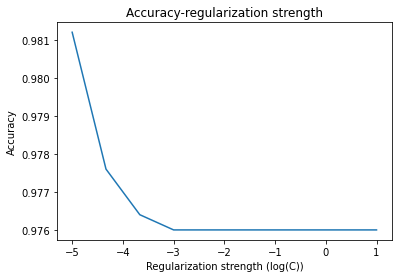

In [30]:
plt.title('Accuracy-regularization strength')
plt.xlabel('Regularization strength (log(C))')
plt.ylabel('Accuracy')
plt.plot(np.linspace(-5,1,10),acc)